In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
from datetime import datetime

sns.set()

# Vamos rodar o modelo! 

In [2]:

sys.path.append("../src/")

from models import SimulateStatement, Model
from modelstats import ModelStats

In [3]:
# sys.path.append("../data/")

data_path = "../data/DATA_FINAL.csv"
data_deputados_path = "../data/DEPUTADOS_FINAL.csv"

Experimento = ModelStats(data_path, data_deputados_path)

lambd = 0.6
delta = 0.3
lag = 10

In [4]:
Experimento = Experimento.get_votes(lambd, delta, lag, datetime(2019,7,12))

0it [00:00, ?it/s]

19it [00:00, 45.52it/s]


In [5]:
Experimento = Experimento.get_changes()
Experimento = Experimento.get_fluxes()

19it [00:00, 24833.83it/s]
  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:19<00:00,  1.01s/it]


In [6]:
Experimento.times.iloc[-1]

Timestamp('2019-07-29 00:31:08')

In [7]:
Experimento.calculate_approval_probability(lambd, delta)

running sliding window


 94%|█████████▍| 340/360 [00:05<00:00, 100.95it/s]

In [55]:
from plots import plot_fluxes

In [6]:
def plot_fluxes(Experimento):

    fig, axs = plt.subplots(3, figsize = (10,5))

    # AXES: A -> K ; K -> O ; A -> O;
    PhiAK = np.transpose(Experimento.fluxes)[0]
    PhiKO = np.transpose(Experimento.fluxes)[1]
    PhiAO = np.transpose(Experimento.fluxes)[2]

    fluxmax = np.max(np.concatenate([PhiAK,PhiKO,PhiAO]))
    fluxmin =np.min(np.concatenate([PhiAK,PhiKO,PhiAO]))

    plt.setp(axs, yticks=[-fluxmin, 0, fluxmax])

    axs[0].set_title(r'$\phi_{AK}$') 
    axs[0].plot(PhiAK)
    axs[0].set_ylim(-4,4)

    axs[1].set_title(r'$\phi_{KO}$') 
    axs[1].plot(PhiKO)
    axs[1].set_ylim(-4,4)

    axs[2].set_title(r'$\phi_{AO}$') 
    axs[2].plot(PhiAO)
    axs[2].set_ylim(-4,4)

    fig.tight_layout()

# Contando todos os politicos mesmo os não declarantes

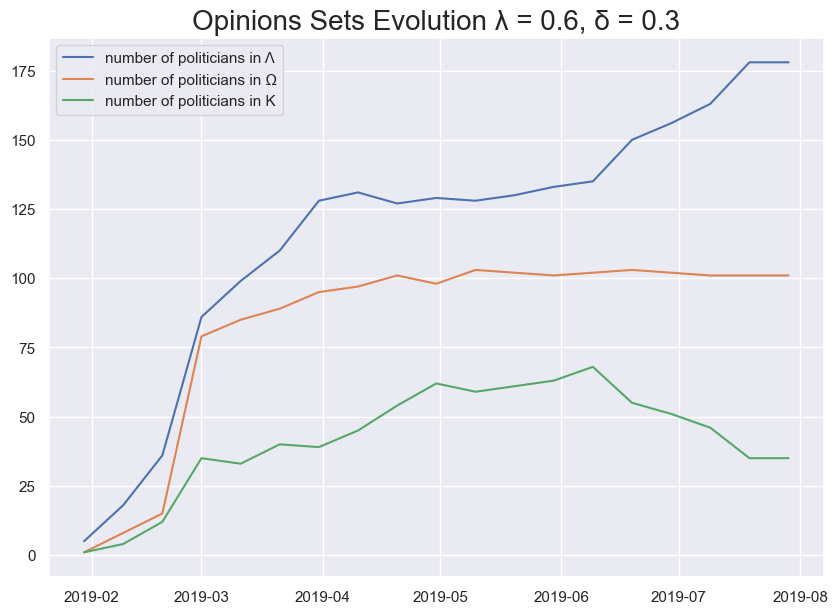

In [7]:
plt.figure(figsize=(10,7))

plt.title('Opinions Sets Evolution λ = %s, δ = %s'%(lambd,delta), fontsize = 20)

plt.plot(Experimento.times, Experimento.A, label = 'number of politicians in Λ')

plt.plot(Experimento.times, Experimento.O, label = 'number of politicians in Ω')

plt.plot(Experimento.times,Experimento.K, label = 'number of politicians in K')



plt.legend()


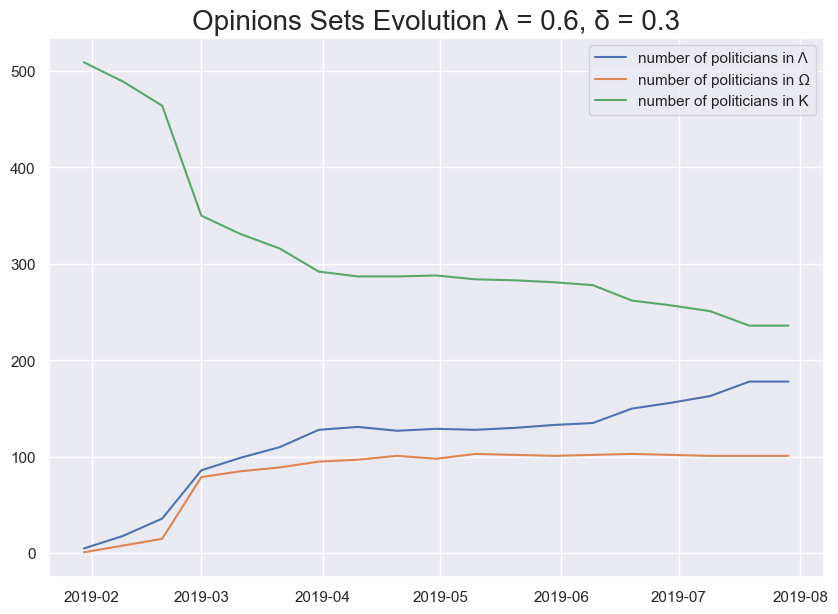

In [52]:
plt.figure(figsize=(10,7))

plt.title('Opinions Sets Evolution λ = %s, δ = %s'%(lambd,delta), fontsize = 20)

plt.plot(Experimento.times, Experimento.A, label = 'number of politicians in Λ')

plt.plot(Experimento.times, Experimento.O, label = 'number of politicians in Ω')

plt.plot(Experimento.times,Experimento.K, label = 'number of politicians in K')



plt.legend()



# Contando apenas os que se declaram no twitter

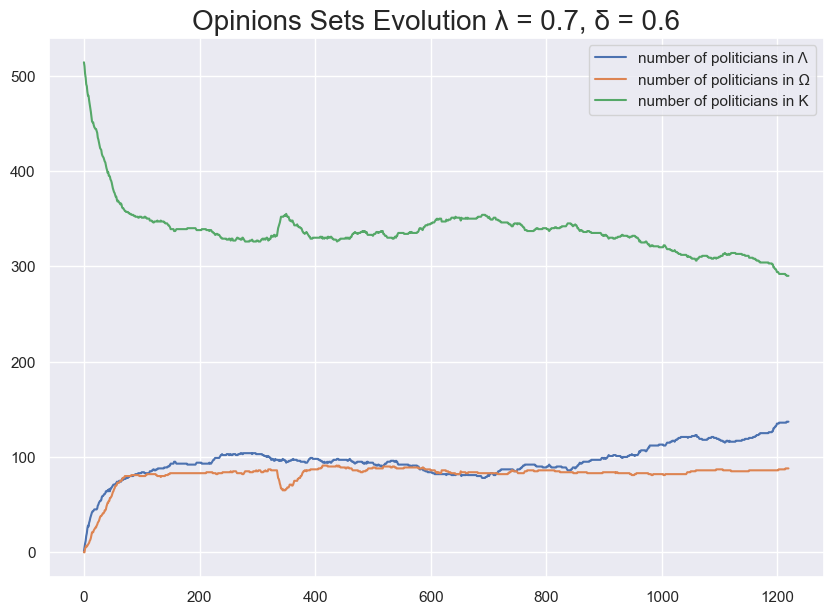

In [9]:
plt.figure(figsize=(10,7))

plt.title('Opinions Sets Evolution λ = %s, δ = %s'%(lambd,delta), fontsize = 20)

plt.plot(np.transpose(tot_sets)[0], label = 'number of politicians in Λ')

plt.plot(np.transpose(tot_sets)[1], label = 'number of politicians in Ω')

plt.plot(np.transpose(tot_sets)[2], label = 'number of politicians in K')

plt.legend()

In [15]:
parties_evolution = Experimento.visualize_parties_evolution(Plista)

 11%|█         | 130/1220 [01:09<09:43,  1.87it/s]


KeyboardInterrupt: 

In [ ]:
serie_A, serie_K, serie_O = Experimento.serie_temporal_partido('PT')

<AxesSubplot: title={'center': 'PT Opinion evolution \n Lag=10'}>

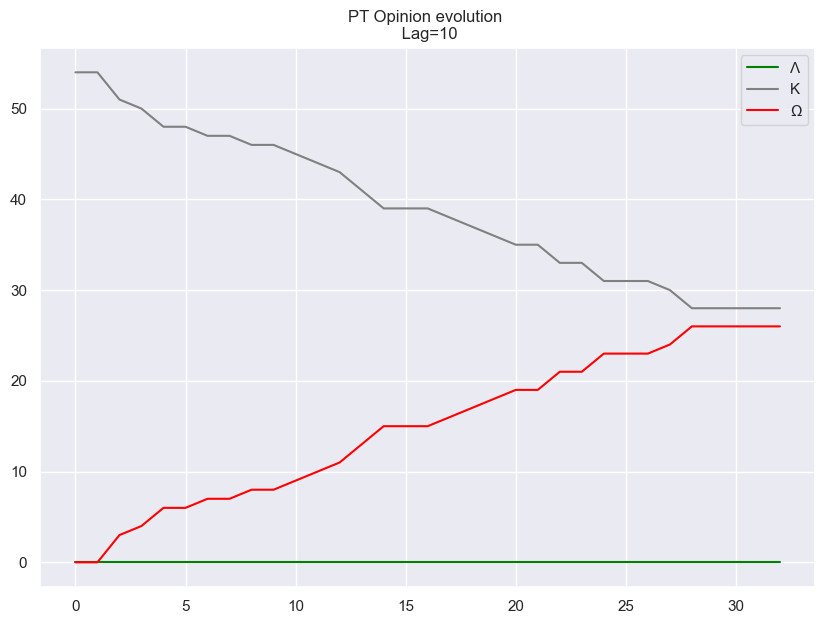

In [ ]:
serie_A, serie_K, serie_O = Experimento.serie_temporal_partido('PT')
df_pt = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_pt.columns = ['Λ','K','Ω']
df_pt.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='PT Opinion evolution \n Lag=%s'%lag)


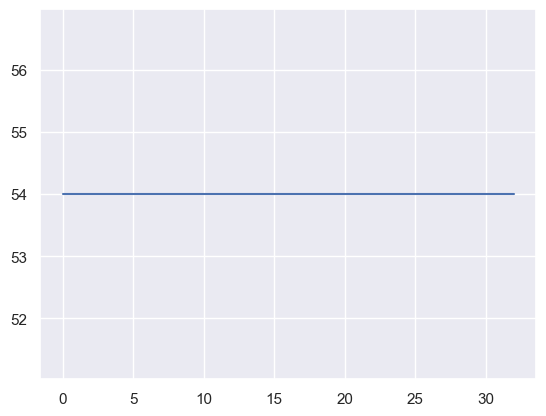

In [ ]:
plt.plot(df_pt.T.sum())

<Axes: title={'center': 'MDB Opinion evolution \n Lag=10'}>

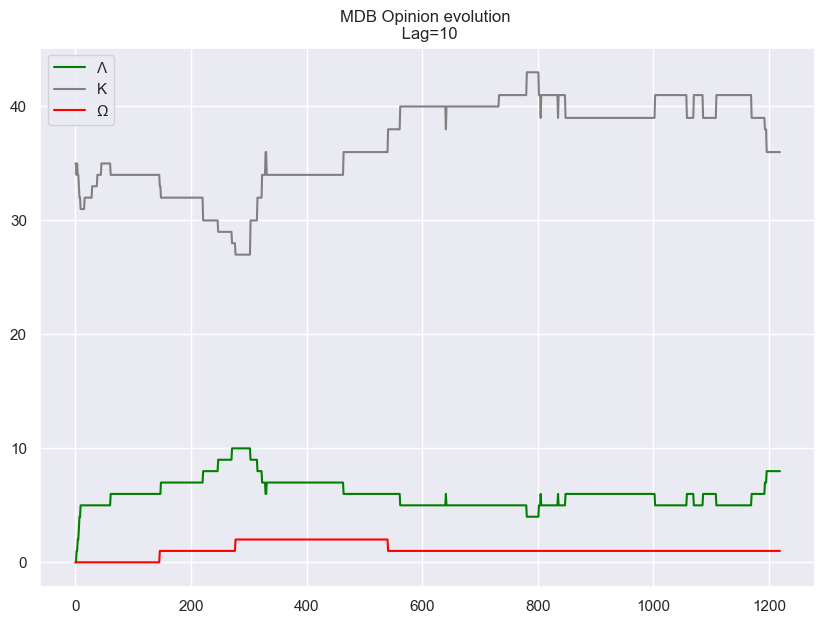

In [ ]:
serie_A, serie_K, serie_O = Experimento.serie_temporal_partido('MDB')
df_mdb = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_mdb.columns = ['Λ','K','Ω']
df_mdb.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='MDB Opinion evolution \n Lag=%s'%lag)

<AxesSubplot: title={'center': 'PSL Opinion evolution \n Lag=10'}>

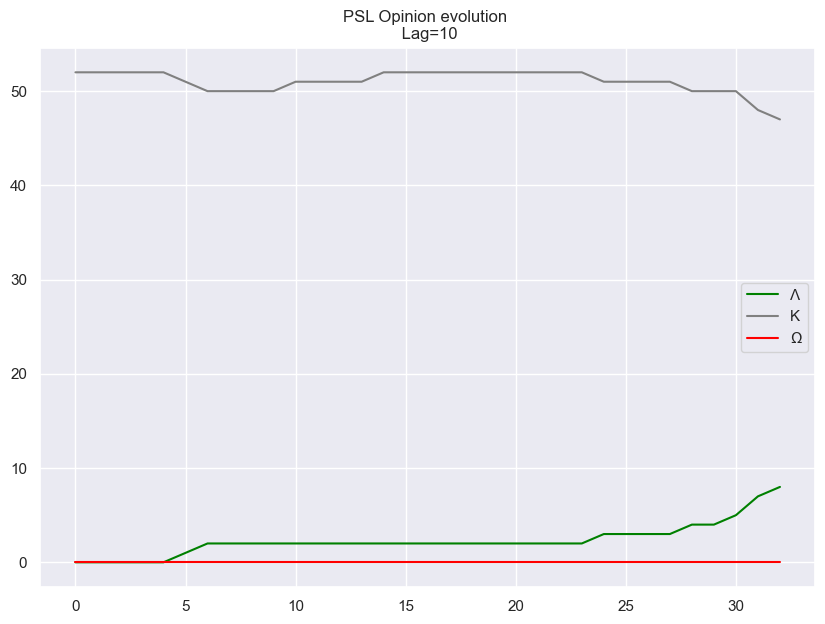

In [ ]:
serie_A, serie_K, serie_O = Experimento.serie_temporal_partido('PSL')
df_psl = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_psl.columns = ['Λ','K','Ω']
df_psl.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='PSL Opinion evolution \n Lag=%s'%lag)

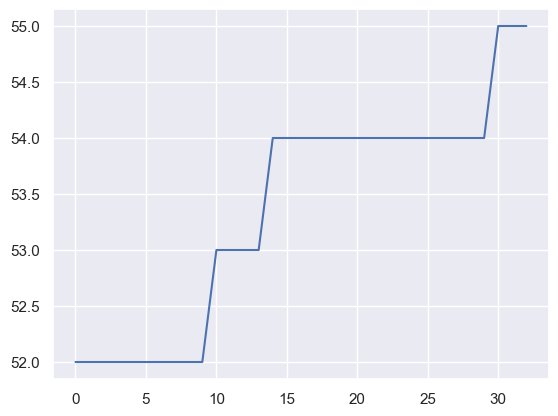

In [ ]:
plt.plot(df_psl.T.sum())

<Axes: title={'center': 'PSL Opinion evolution \n Lag=10'}>

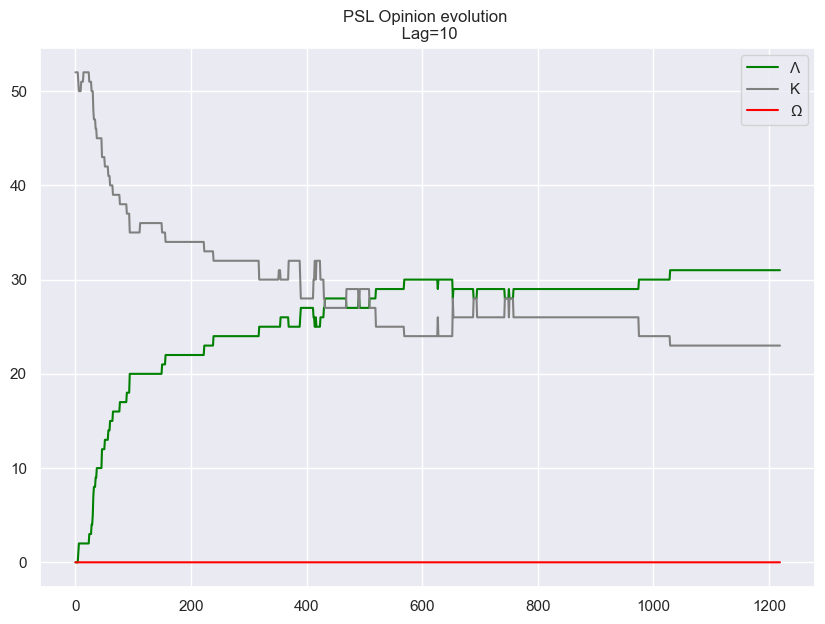

In [ ]:
serie_A, serie_K, serie_O = Experimento.serie_temporal_partido('PSL')
df_psl = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_psl.columns = ['Λ','K','Ω']
df_psl.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='PSL Opinion evolution \n Lag=%s'%lag)

In [25]:
np.where(pd.Series([1,2,3])- pd.Series([1,2,3]) != 1)

(array([0, 1, 2]),)

In [27]:
Experimento.get_fluxes_df_interval(lambd, delta,lag)

/Users/joao/politcalShit/notebooks/../src/models.py:470: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  tempo = self.df.time[1::lag]
  0%|          | 1/1220 [00:02<41:33,  2.05s/it]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

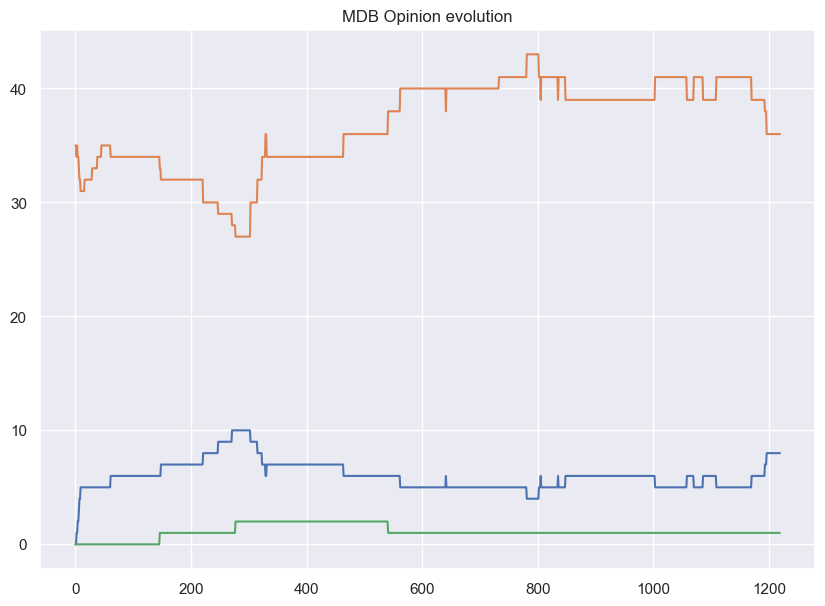

In [16]:
serie_A, serie_K, serie_O = Experimento.serie_temporal_partido('MDB')
plt.figure(figsize=(10,7))
plt.title('MDB Opinion evolution')
plt.plot(serie_A)
plt.plot(serie_K)
plt.plot(serie_O)

In [17]:
Experimento.deputados.Partido.count()

515

In [18]:
parties_evolution[0].keys()

dict_keys(['AVANTE', 'DC', 'DEM', 'MDB', 'NOVO', 'PATRI', 'PC do B', 'PDT', 'PHS', 'PMN', 'PODE', 'PP', 'PPL', 'PPS', 'PR', 'PRB', 'PROS', 'PRP', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSL', 'PSOL', 'PT', 'PTB', 'PTC', 'PV', 'REDE', 'SD'])

In [19]:
parties_evolution[-1]['PC do B']

{1: 0, 0: 1, -1: 8}

In [20]:
tempo=Experimento.time

In [37]:
# plt.figure(figsize=(10,5))
# plt.plot(tempo[1:],lens )
# plt.gcf().autofmt_xdate()
# plt.title('Entrada de novos politicos no debate a partir da data inicial', fontsize=17)
# plt.show()

In [38]:
# plt.figure(figsize=(10,5))
# plt.plot(tempo[1:],lens )
# plt.gcf().autofmt_xdate()
# plt.title('Addition of Elected representatives in the current Twitter debate', fontsize=17)
# plt.show()

<Axes: >

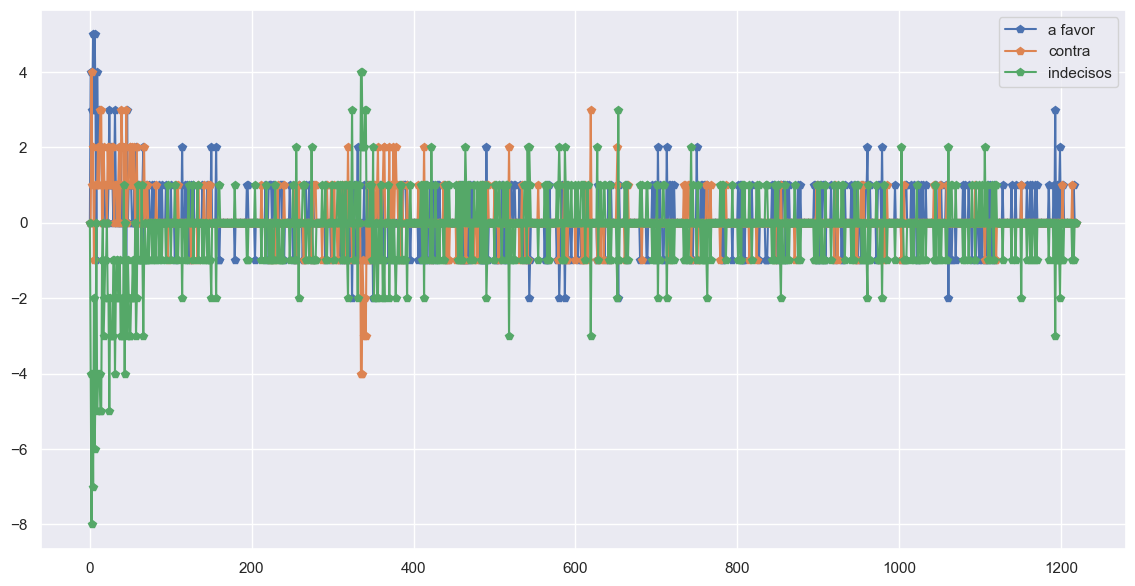

In [23]:
pd.DataFrame(changes,
             columns=['a favor',
                      'contra',
                      'indecisos']).plot(figsize=(14,7),
                                         grid=True,
                                         marker='p')

<Axes: >

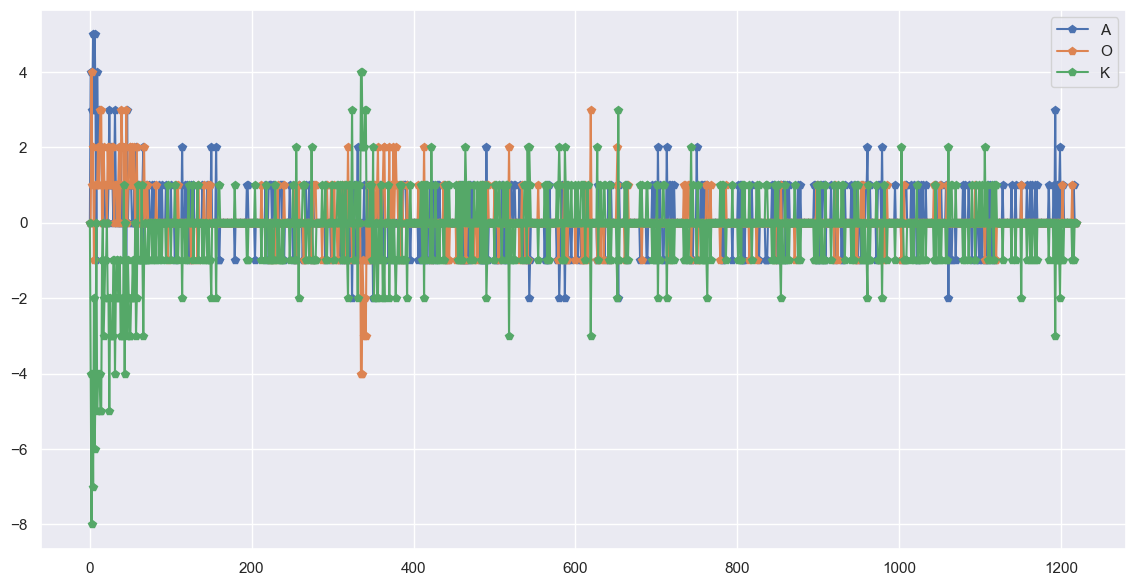

In [24]:
pd.DataFrame(changes,
             columns=['A',
                      'O',
                      'K']).plot(figsize=(14,7),
                                         grid=True,
                                         marker='p')

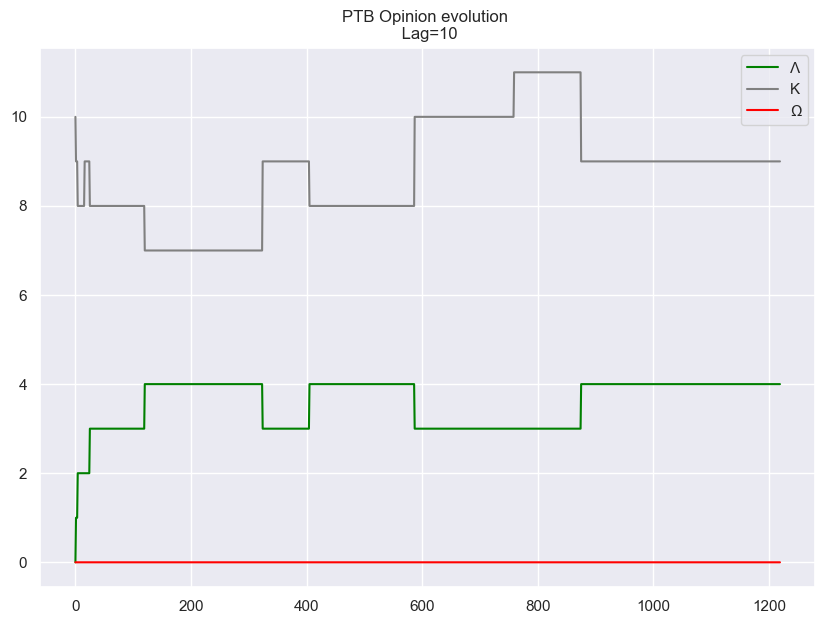

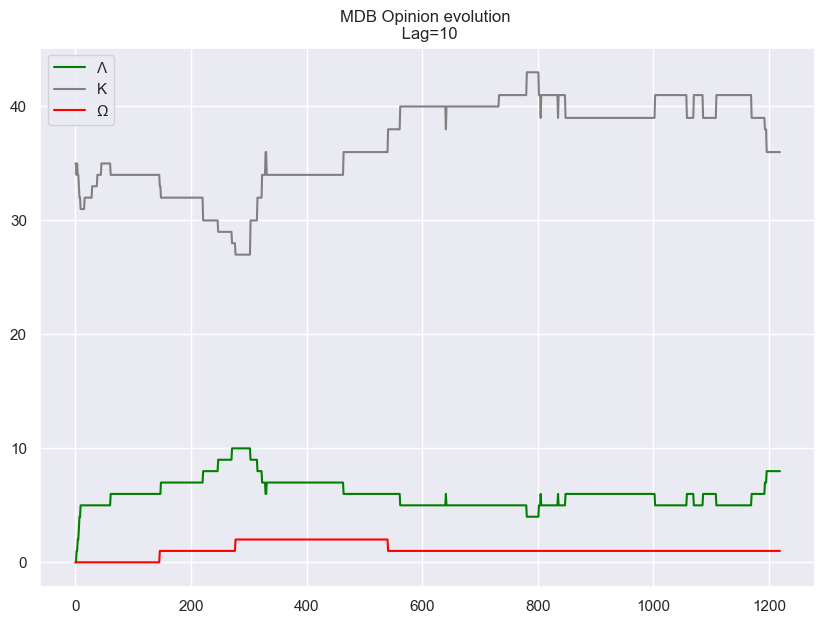

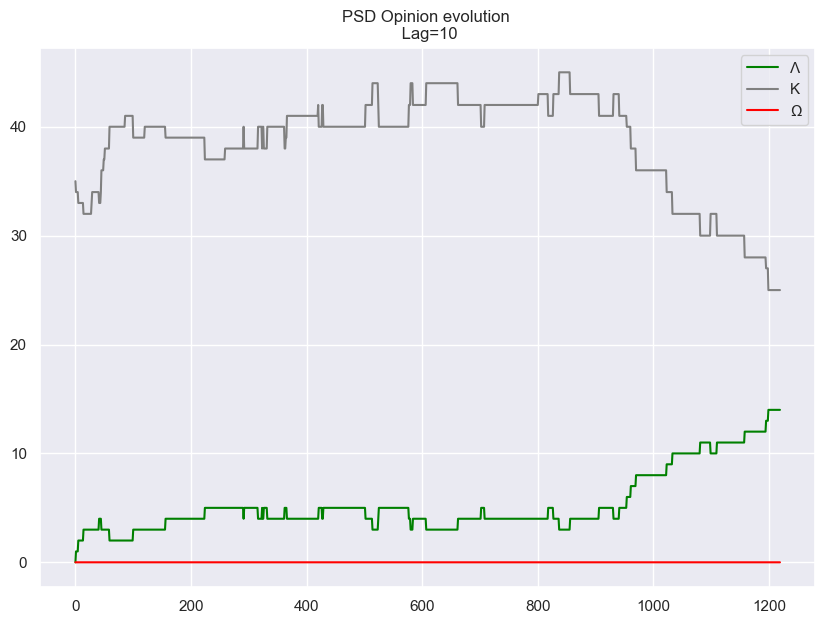

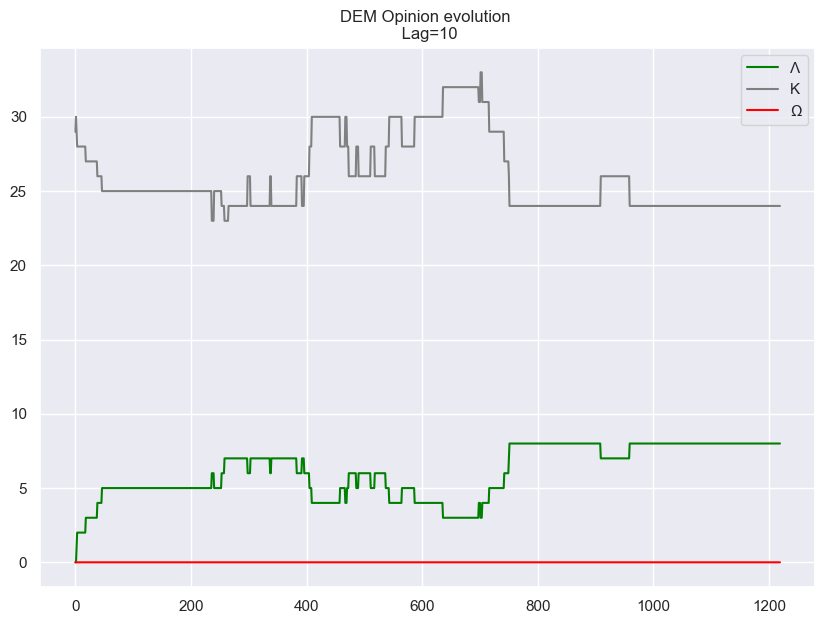

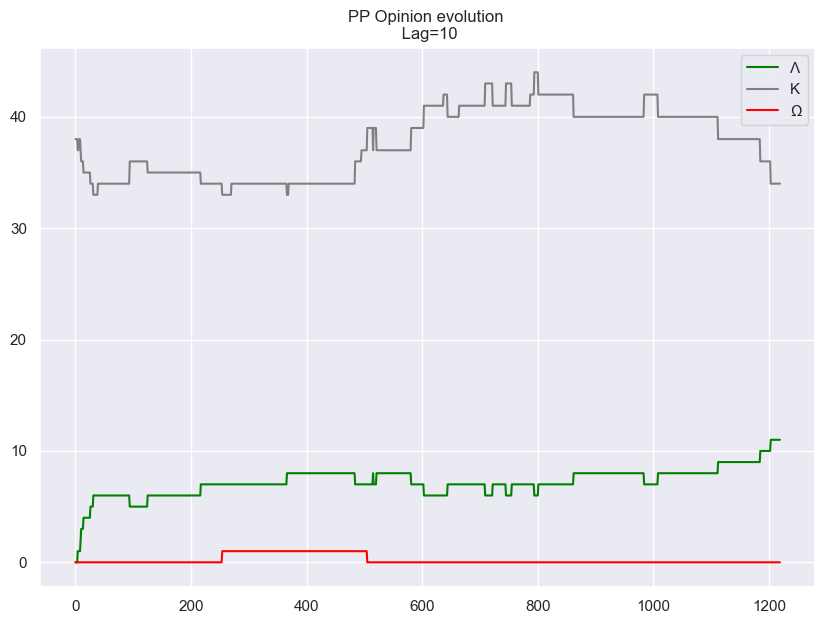

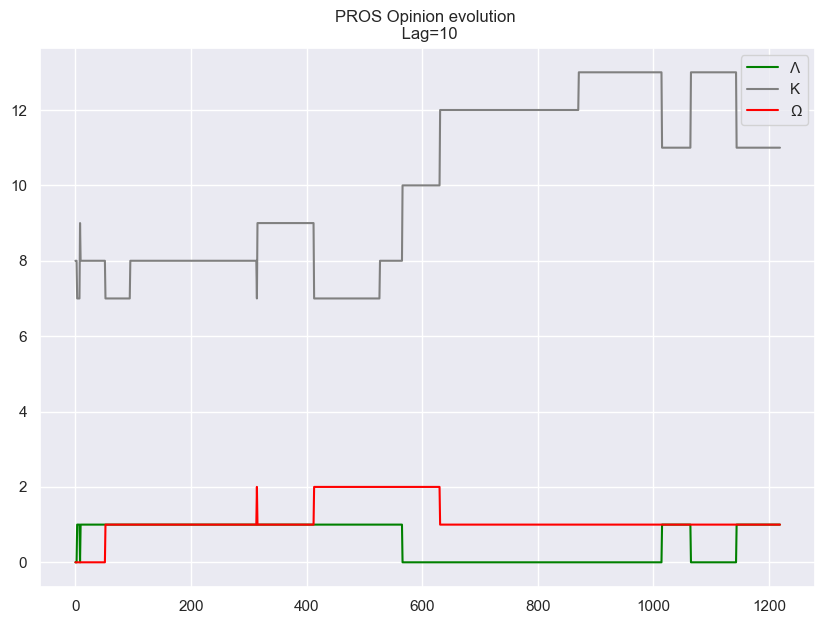

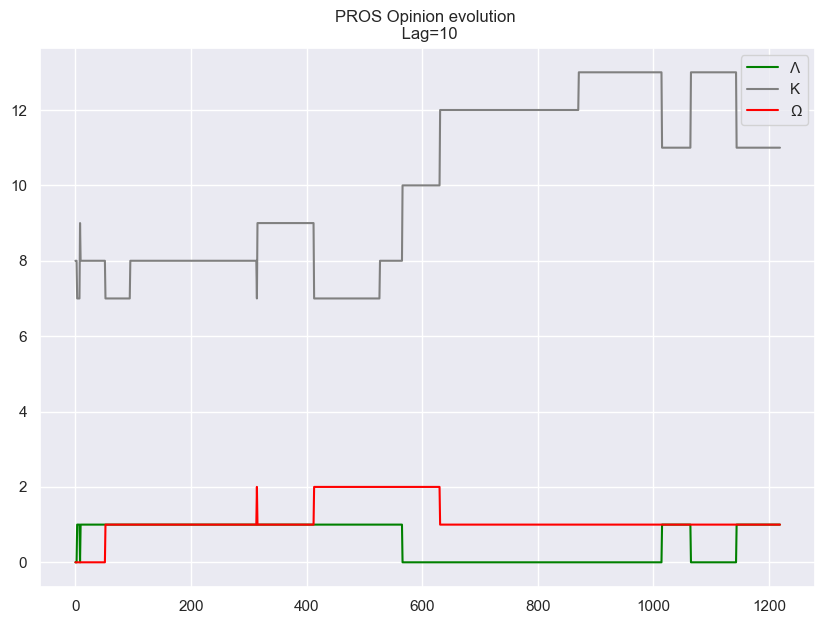

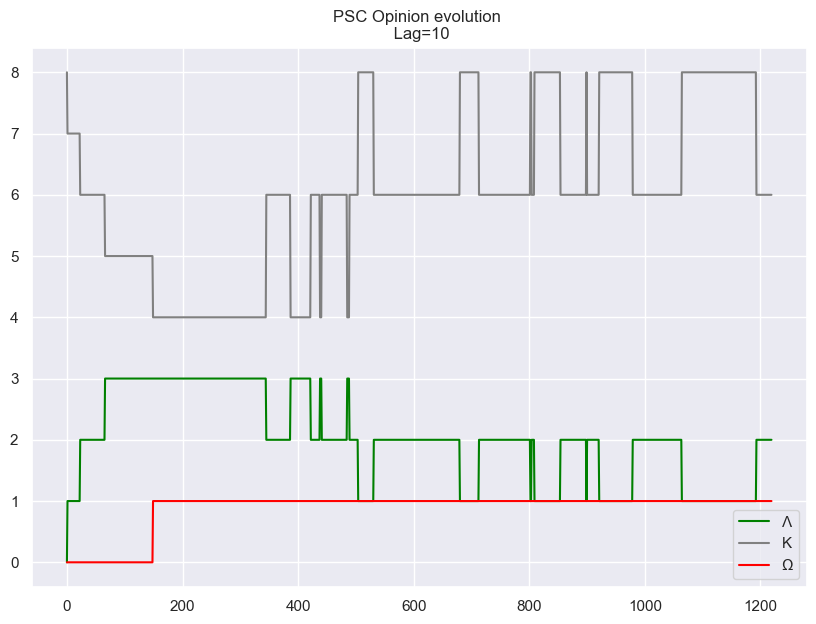

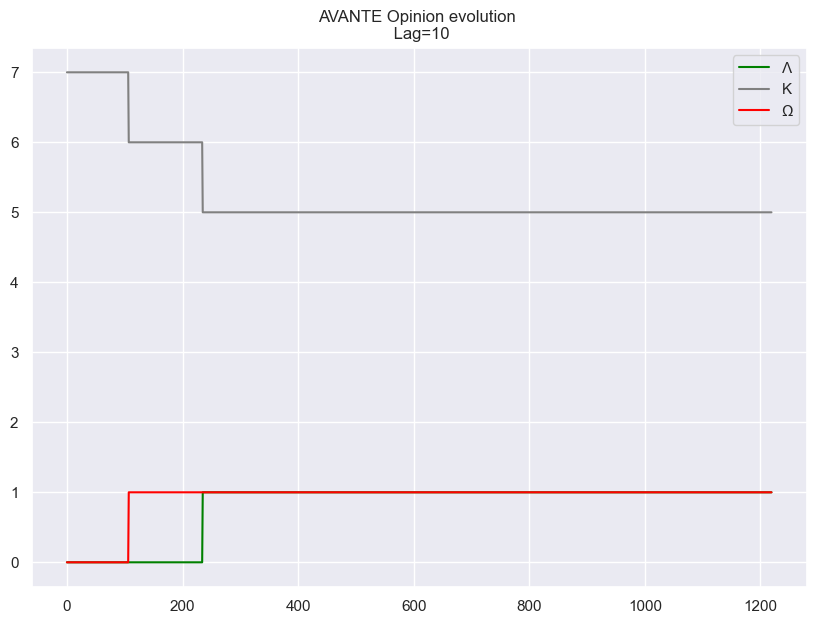

In [25]:
# PARTIDOS CENTRAO
centrao = ['PTB', 'MDB','PSD', 'DEM', 'PP', 'PROS','PROS','PSC', 'AVANTE']
for partido_now in centrao:
    serie_A, serie_K, serie_O = Experimento.serie_temporal_partido(partido_now)
    df_now = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
    df_now.columns = ['Λ','K','Ω']
    df_now.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='%s Opinion evolution \n Lag=%s'%(partido_now,lag))

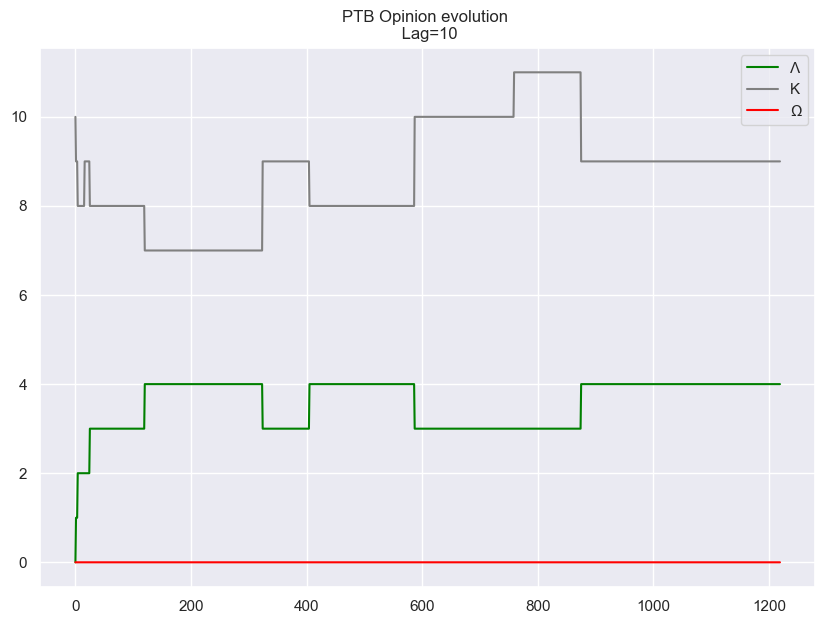

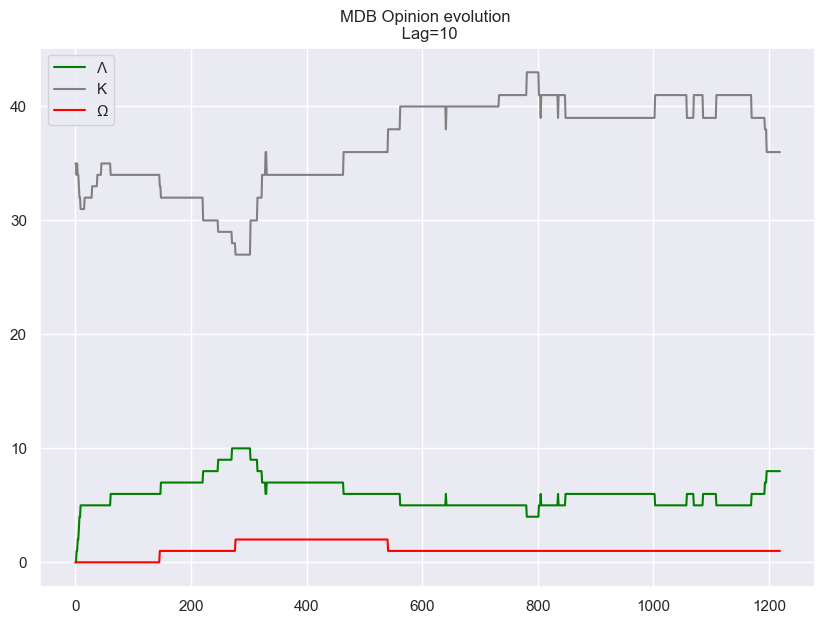

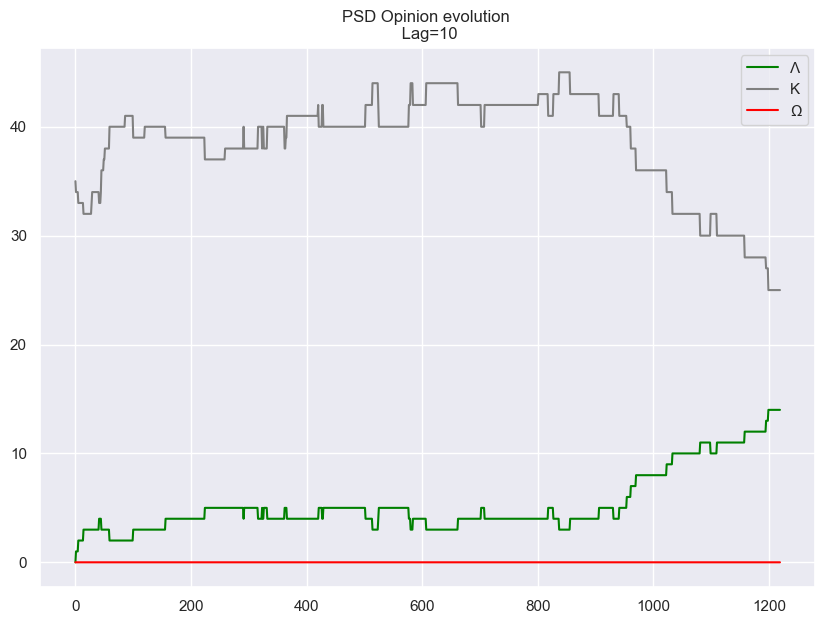

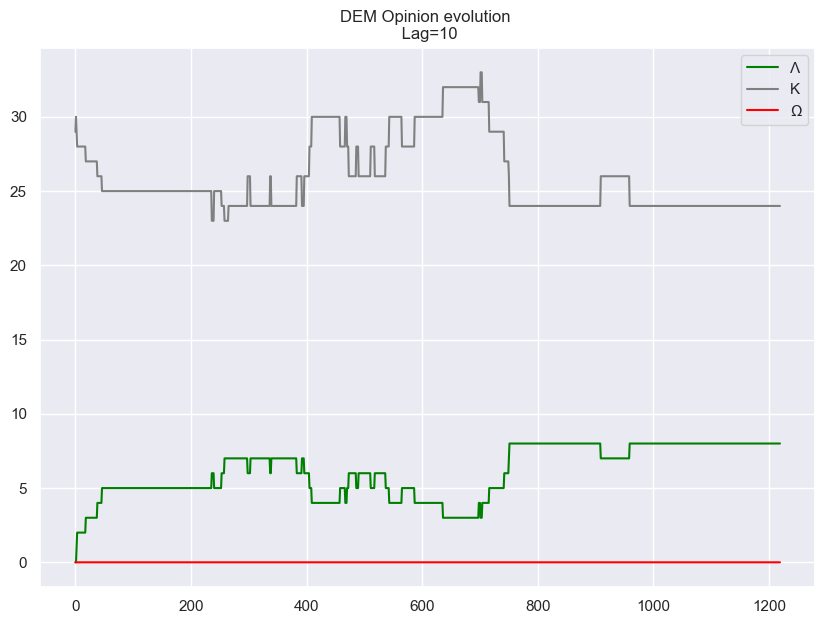

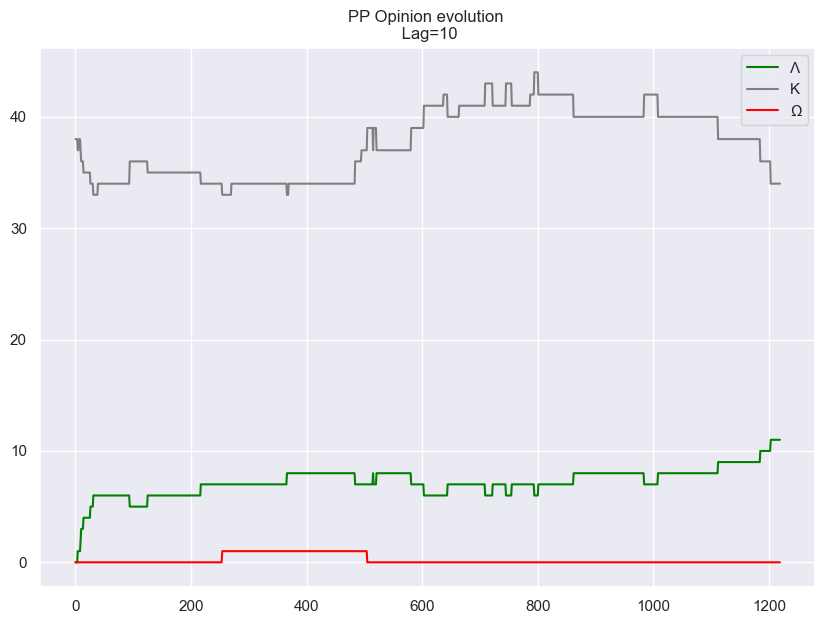

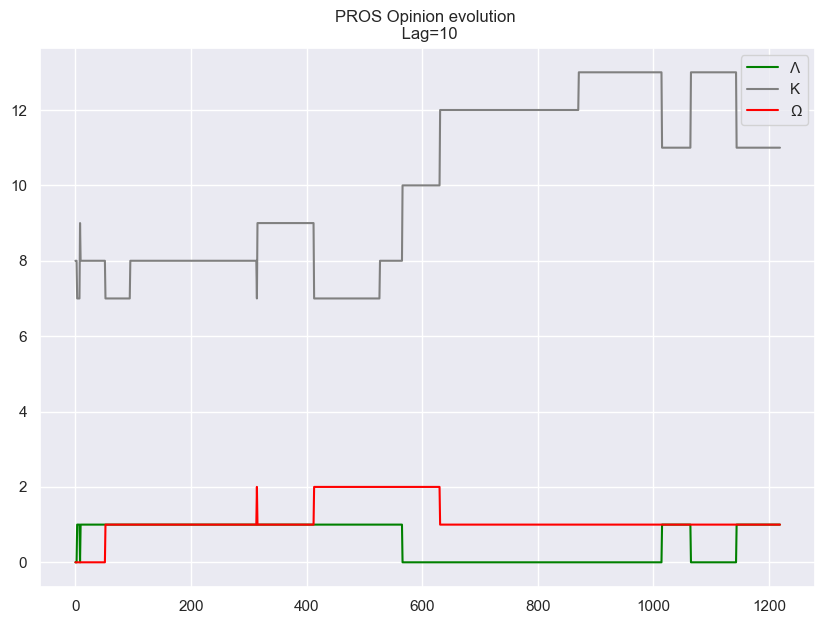

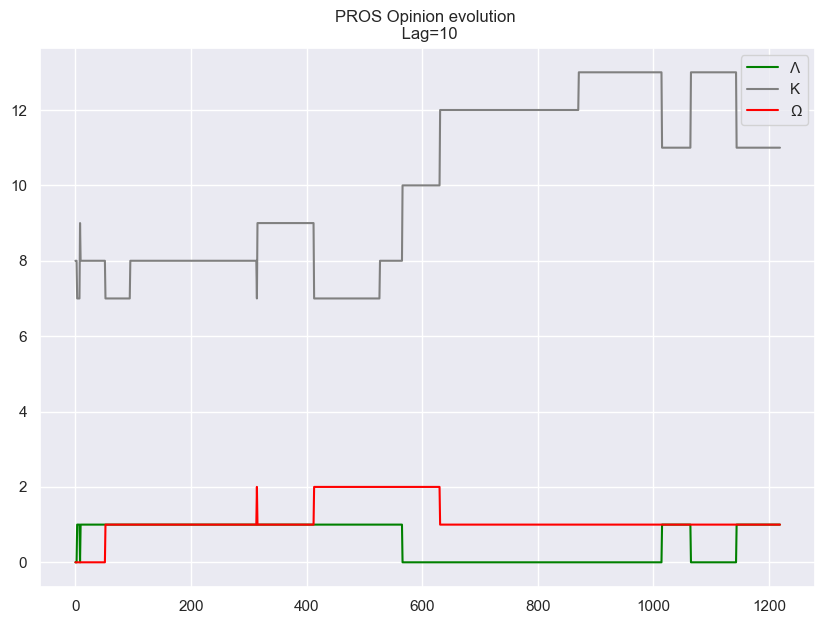

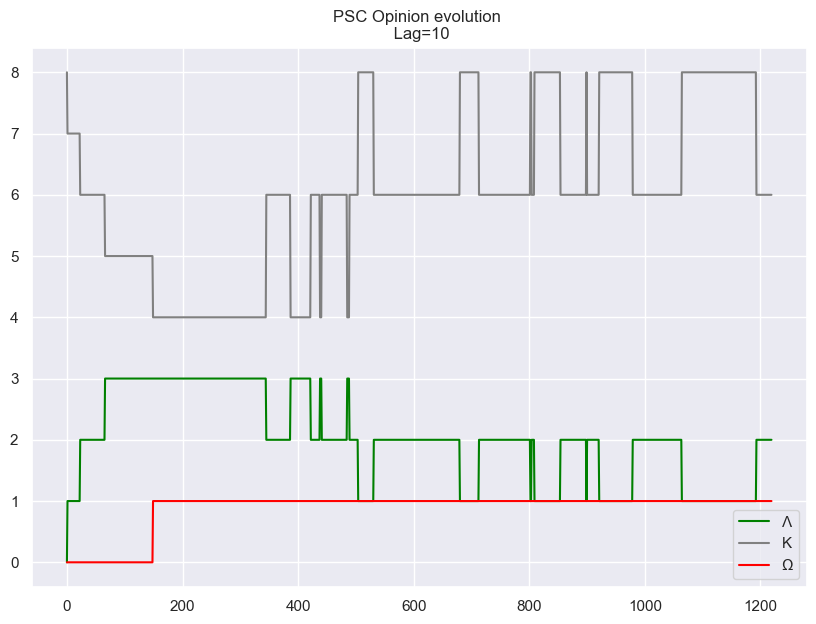

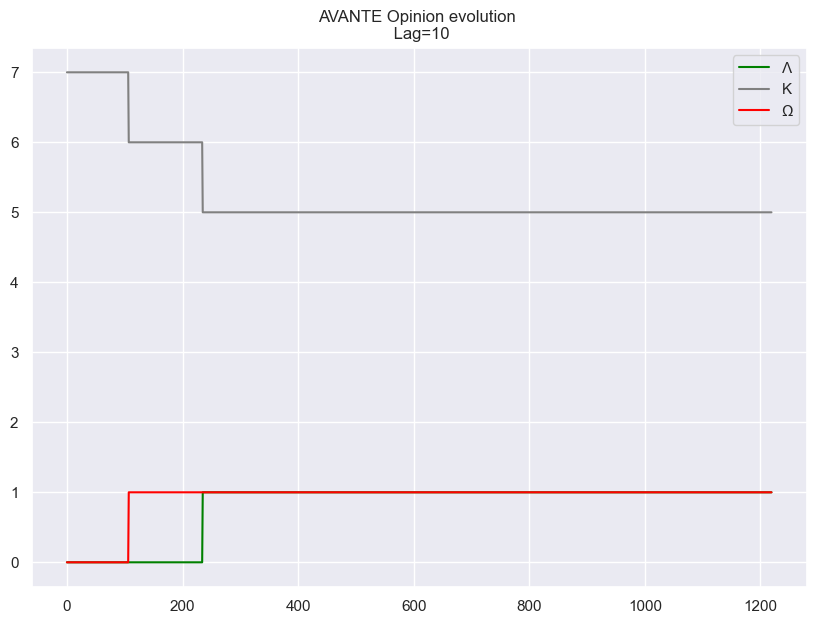

In [26]:
# PARTIDOS CENTRAO
centrao = ['PTB', 'MDB','PSD', 'DEM', 'PP', 'PROS','PROS','PSC', 'AVANTE']
for partido_now in centrao:
    serie_A, serie_K, serie_O = Experimento.serie_temporal_partido(partido_now)
    df_now = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
    df_now.columns = ['Λ','K','Ω']
    df_now.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='%s Opinion evolution \n Lag=%s'%(partido_now,lag))

In [ ]:
### FLUXOS
Experimento.get_fluxes_df_interval(lambd,delta,lag)